In [191]:
# importing packages
import pandas as pd
import numpy as np
import time
import qcodes as qc
import pyvisa as visa
import ipywidgets as widgets
# enable to get a more debuggable output:
#visa.log_to_screen()

# importing the instrument driver packages: 
from qcodes.instrument_drivers.yokogawa.GS200 import GS200
from qcodes.instrument_drivers.tektronix.Keithley_2400 import Keithley_2400

# pyvisa-py resource manager
rm = visa.ResourceManager('@py')

print(rm)

Resource Manager of Visa Library at py


In [82]:
# list the resources that the visapy-py backend detects, should look something like:
# `('ASRL/dev/ttyS4::INSTR', 'USB0::2849::57::91LA25023::0::INSTR')`
resources = rm.list_resources()

# intialize the instrument with the following parameters:

# the instrument is initialized and stored as a variable gs, where "gs200" is its name
gs = GS200("gs200", address=resources[0], terminator="\n")

# the instrument is initialized and stored as a variable gs, where "keith" is its name
keith = Keithley_2400("keithley2400", address=resources[1])

libgpib: invalid descriptor
libgpib: invalid descriptor
libgpib: invalid descriptor
libgpib: invalid descriptor
libgpib: invalid descriptor
libgpib: invalid descriptor
libgpib: invalid descriptor
libgpib: invalid descriptor
libgpib: invalid descriptor
libgpib: invalid descriptor
libgpib: invalid descriptor
libgpib: invalid descriptor
libgpib: invalid descriptor
libgpib: invalid descriptor
libgpib: invalid descriptor
libgpib: invalid descriptor
libgpib: invalid descriptor
libgpib: invalid descriptor
libgpib: invalid descriptor
libgpib: invalid descriptor
libgpib: invalid descriptor
libgpib: invalid descriptor
libgpib: invalid descriptor
libgpib: invalid descriptor
libgpib: invalid descriptor
libgpib: invalid descriptor
libgpib: invalid descriptor
libgpib: invalid descriptor
libgpib: invalid descriptor
libgpib: invalid descriptor
libgpib: invalid descriptor
libgpib: invalid descriptor
libgpib: invalid descriptor
libgpib: invalid descriptor
libgpib: invalid descriptor
libgpib: invalid des

Connected to: YOKOGAWA GS210 (serial:91LA25023, firmware:1.05) in 0.18s


KeyError: 'Another instrument has the name: gs200'

In [4]:
station = qc.Station()

In [8]:
station.add_component(gs)
station.add_component(keith)

[gs200_program(GS200Program)] Snapshot: Could not update parameter: trigger


RuntimeError: Cannot add component "gs200", because a component of that name is already registered to the station

In [6]:
keith.print_readable_snapshot()

keithley2400:
	parameter  value
--------------------------------------------------------------------------------
IDN         :	{'vendor': 'KEITHLEY INSTRUMENTS INC.', 'model': '2400', 'seria...
compliancei :	0.000105 
compliancev :	21 
curr        :	None (A)
mode        :	VOLT 
nplci       :	1 
nplcv       :	1 
output      :	False 
rangei      :	0.000105 
rangev      :	21 
resistance  :	None (Ohm)
sense       :	"CURR:DC" 
timeout     :	10 (s)
volt        :	None (V)


In [7]:
gs.print_readable_snapshot()

gs200:
	parameter    value
--------------------------------------------------------------------------------
BNC_in        :	TRIG 
BNC_out       :	TRIG 
IDN           :	{'vendor': 'YOKOGAWA', 'model': 'GS210', 'serial': '91LA25023...
auto_range    :	False 
current_limit :	0.2 (I)
four_wire     :	off 
guard         :	off 
line_freq     :	60 (Hz)
output        :	off 
output_level  :	0 (V)
range         :	1 (V)
source_mode   :	VOLT 
system_errors :	-113,"Undefined header, TRIG" 
timeout       :	10 (s)
voltage       :	0 (V)
voltage_limit :	30 (V)
voltage_range :	1 (V)


ValueError: max() arg is an empty sequence

In [79]:
gs.reset()
gs.auto_range(True)
gs.source_mode('CURR')
gs.current(0)
gs.output('on')

In [80]:
keith.reset()

In [108]:
# lower the compliance current all the way
#keith.mode('VOLT')
keith._set_mode_and_sense('CURR')
keith._set_mode_and_sense('VOLT')
keith.compliancei(1e-06)
keith.rangev(30)
#keith.sense()
keith.output(1)
# resetting the instrument

In [134]:
keith.mode('CURR')
keith.sense("VOLT:DC")
keith.mode('VOLT')
keith.compliancei(1e-06)
keith.rangev(30)
keith.output(1)

In [135]:
import numpy as np
import qcodes as qc
from qcodes.dataset import (
    Measurement,
    experiments,
    initialise_or_create_database_at,
    load_by_run_spec,
    load_or_create_experiment,
)

## Dummy instruments for generating synthetic data
from qcodes.tests.instrument_mocks import (
    DummyInstrument, 
    DummyInstrumentWithMeasurement
)

## Multidimensional scanning module
from qcodes.utils.dataset.doNd import (
    dond, 
    LinSweep
)

## Integrated plotting module
from qcodes.dataset.plotting import plot_dataset

## Using interactive widget
from qcodes.interactive_widget import experiments_widget

In [136]:
initialise_or_create_database_at("~/experiments_for_15_mins.db")

In [137]:
tutorial_exp = load_or_create_experiment(
    experiment_name="tutorial_exp",
    sample_name="synthetic data"
)

In [138]:
context_meas = Measurement(exp=tutorial_exp, name='context_example')

In [139]:
# Register the independent parameter...
context_meas.register_parameter(gs.current)
# ...then register the dependent parameter
context_meas.register_parameter(keith.volt, setpoints=(gs.current,))

In [271]:
# Setting up a doNd measurement
sweep_1 = LinSweep(gs.current, -0.004, 0.004, 50, 0.01)

In [272]:
dond(
    sweep_1,                          # 1st independent parameter
    keith.volt,                         # 1st dependent parameter
    measurement_name="dond_example",  # Set the measurement name
    exp=tutorial_exp,             # Set the experiment to save data to.
    show_progress=True                # Optional progress bar
)

Starting experimental run with id: 23. Using 'qcodes.dataset.dond'


  0%|          | 0/50 [00:00<?, ?it/s]

(dond_example #23@/root/experiments_for_15_mins.db
 -------------------------------------------------
 gs200_current - numeric
 keithley2400_volt - numeric,
 [None],
 [None])

In [276]:
tutorial_exp.data_sets()[-1]

dond_example #22@/root/experiments_for_15_mins.db
-------------------------------------------------
gs200_current - numeric
keithley2400_volt - numeric

In [277]:
dataset = tutorial_exp.data_sets()[-1]

([<AxesSubplot:title={'center':'Run #23, Experiment tutorial_exp (synthetic data)'}, xlabel='Current ($10^{-3}$ I)', ylabel='Voltage (V)'>],
 [None])

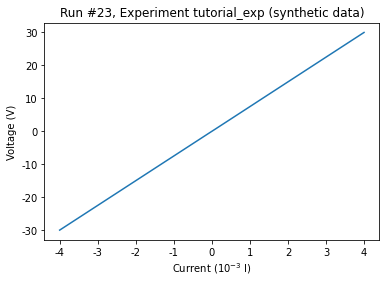

In [278]:
plot_dataset(dataset)

In [279]:
df = dataset.to_pandas_dataframe()
df.reset_index()[:1]

,gs200_current,keithley2400_volt
0,-0.004,-29.94177


In [280]:
import matplotlib.pyplot as plt

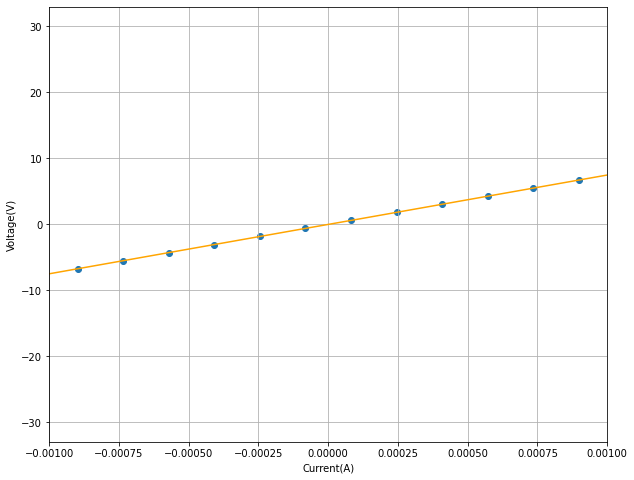

In [283]:
import random
plt.figure(figsize=(10, 8))
ax = plt.axes()
ax.scatter(x=df.reset_index().loc[:,"gs200_current"], y=df.reset_index().loc[:,"keithley2400_volt"])
ax.plot(df, color="orange")

ax.set_xlabel('Current(A)')
ax.set_ylabel('Voltage(V)')

plt.grid()

plt.xlim([-0.001, 0.001])
plt.show()

In [284]:
gs.reset()

In [285]:
keith.reset()